## 회귀(Regression)

---

- 인과 관계를 파악하는 분석
    - 예. 마케팅 비용을 늘리면 매출이 늘어나는가?

- 머신러닝 관점에서의 회귀 사용
    - 예측 : 설명변수로부터 결과변수를 예측하는 모델(함수식)을 구함

#### 분류와 회귀 차이점
분류 : category 반환  
    - 사자, 고양이  
    
회귀 : 숫자값  
    - 아파트 값 예측  
    - 매출 증가액 예측  

- 선형회귀

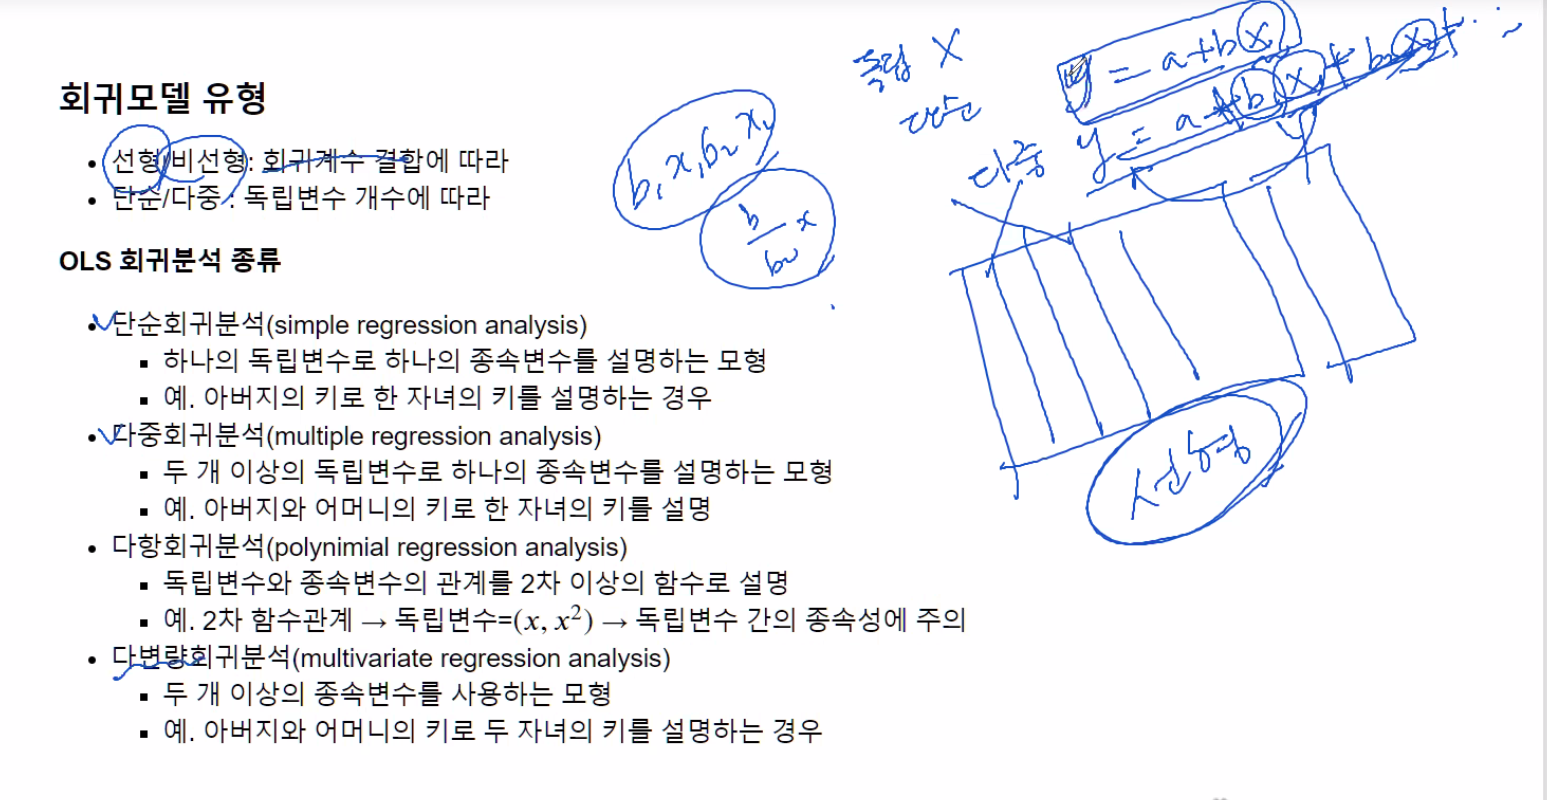

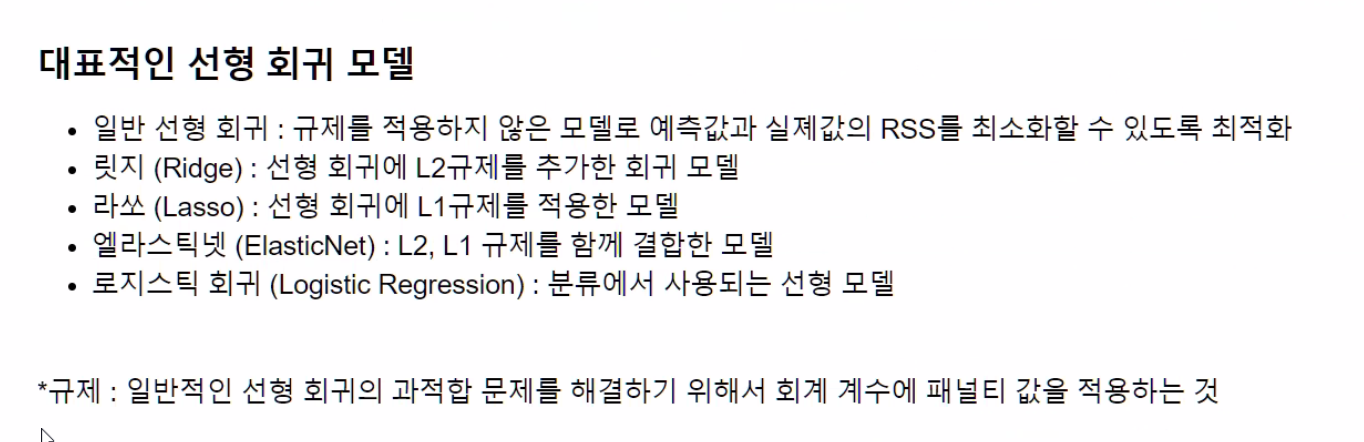

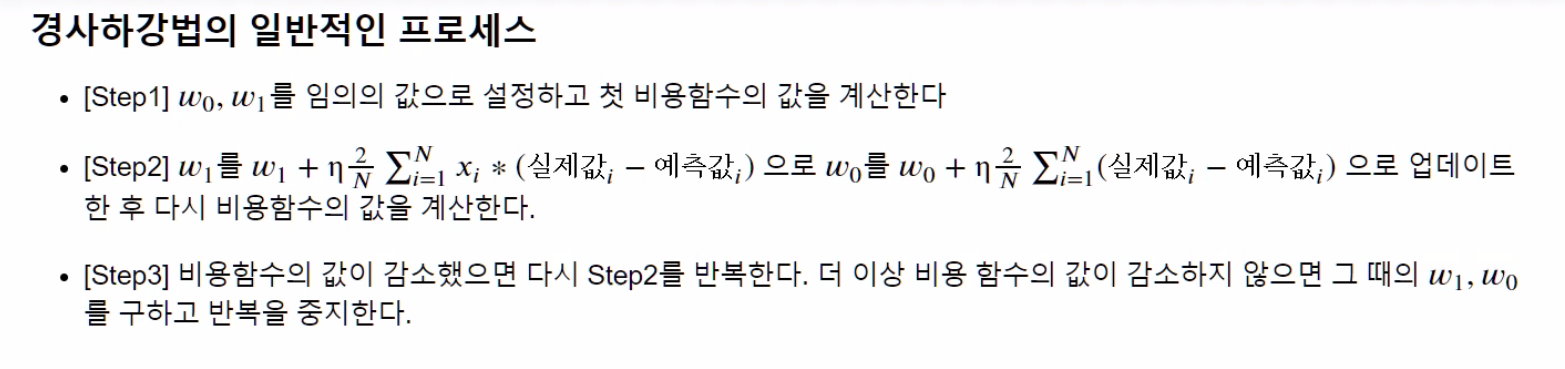

### 실제값을 Y=4x+6 시뮬레이션하는 데이터 값 생성

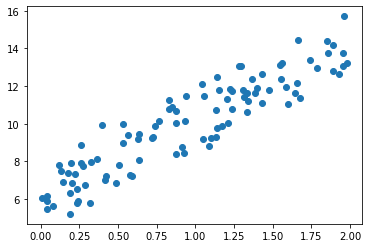

In [1]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

np.random.seed(0)

# y = 4X + 6 식을 근사(w1=4, w0=6). random 값은 Noise를 위해 만듬
X = 2 * np.random.rand(100,1)
y = 6 + 4 * X + np.random.randn(100,1)

# X, y 데이터 셋 scatter plot으로 시각화
plt.scatter(X, y)

In [2]:
X.shape, y.shape

((100, 1), (100, 1))

In [3]:
def get_weight_updates(w1, w0, X, y, learning_rate=0.01):
    N = len(y)
    
    # 먼저 w1_update, w0_update를 각각 w1, w0의 shape와 동일한 크기를 가진 0 값으로 초기화
    w1_update = np.zeros_like(w1)
    w0_update = np.zeros_like(w0)
    
    # 예측 배열 계산하고 예측과 실제 값의 차이 계산
    y_pred = np.dot(X, w1.T) + w0
    diff = y-y_pred
         
    # w0_update를 dot 행렬 연산으로 구하기 위해 모두 1값을 가진 행렬 생성 
    w0_factors = np.ones((N,1))

    # w1과 w0을 업데이트할 w1_update와 w0_update 계산
    w1_update = -(2/N)*learning_rate*(np.dot(X.T, diff))
    w0_update = -(2/N)*learning_rate*(np.dot(w0_factors.T, diff))    
    
    return w1_update, w0_update

반복적으로 경사 하강법을 이용하여 get_weight_updates()를 호출하여 w1와 w0를 업데이트

In [4]:
def gradient_descent_steps(X, y, iters=10000):
    # w0와 w1을 모두 0으로 초기화. 
    w0 = np.zeros((1,1))
    w1 = np.zeros((1,1))
    
    # 인자로 주어진 iters 만큼 반복적으로 get_weight_updates() 호출하여 w1, w0 업데이트 수행. 
    for ind in range(iters):
        w1_update, w0_update = get_weight_updates(w1, w0, X, y, learning_rate=0.01)
        w1 = w1 - w1_update
        w0 = w0 - w0_update
              
    return w1, w0


예측 오차 비용을 계산을 수행하는 함수 get_cost()생성 및 경사 하강법 수행

In [5]:
def get_cost(y, y_pred):
    N = len(y) 
    cost = np.sum(np.square(y - y_pred))/N
    return cost

In [6]:
w1, w0 = gradient_descent_steps(X, y, iters=1000)
print("w1:{0:.3f} w0:{1:.3f}".format(w1[0,0], w0[0,0]))

y_pred = w1[0,0] * X + w0
print('Gradient Descent Total Cost:{0:.4f}'.format(get_cost(y, y_pred)))

w1:4.022 w0:6.162
Gradient Descent Total Cost:0.9935


경사하강법으로 구한 선형식을 시각화

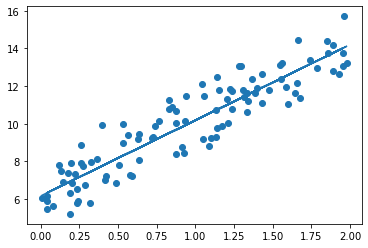

In [7]:
plt.scatter(X,y)
plt.plot(X,y_pred)

---

### 미니 배치 확률적 경사하강법

In [8]:
def stochastic_gradient_descent_steps(X, y, batch_size=10, iters=1000):
    w0 = np.zeros((1,1))
    w1 = np.zeros((1,1))
    prev_cost = 100000
    iter_index =0
    
    for ind in range(iters):
        np.random.seed(ind)
        
        # 전체 X, y 데이터에서 랜덤하게 batch_size만큼 데이터 추출하여 sample_X, sample_y로 저장
        stochastic_random_index = np.random.permutation(X.shape[0])
        sample_X = X[stochastic_random_index[0:batch_size]]
        sample_y = y[stochastic_random_index[0:batch_size]]
        
        # 랜덤하게 batch_size만큼 추출된 데이터 기반으로 w1_update, w0_update 계산 후 업데이트
        w1_update, w0_update = get_weight_updates(w1, w0, sample_X, sample_y, learning_rate=0.01)
        w1 = w1 - w1_update
        w0 = w0 - w0_update
    
    return w1, w0


In [9]:
w1, w0 = stochastic_gradient_descent_steps(X, y, iters=1000)
print("w1:",round(w1[0,0],3),"w0:",round(w0[0,0],3))
y_pred1 = w1[0,0] * X + w0
print('Stochastic Gradient Descent Total Cost:{0:.4f}'.format(get_cost(y, y_pred)))


w1: 4.028 w0: 6.156
Stochastic Gradient Descent Total Cost:0.9935


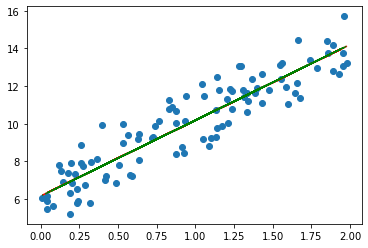

In [10]:
plt.scatter(X, y)
plt.plot(X, y_pred, 'r-.')
plt.plot(X, y_pred1, 'g:')

---

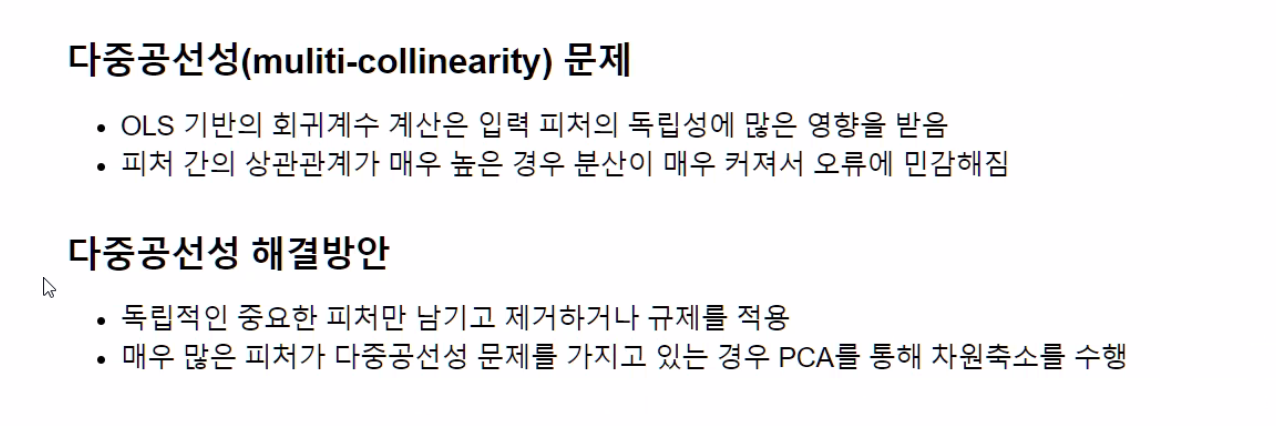

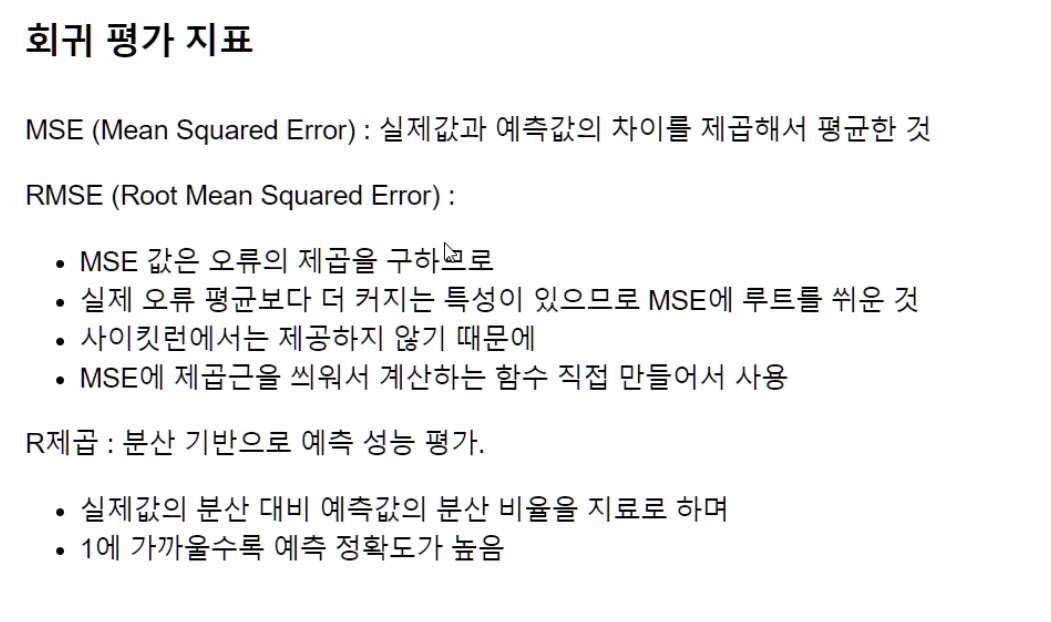

---

In [11]:
# 단순 선형 회귀 분석
# LinearRegression 알고리즘으로 학습
from sklearn.linear_model import LinearRegression

line_fitter = LinearRegression()
line_fitter.fit(X,y)  # 학습

LinearRegression()

In [13]:
# X가 1.5248의 타겟값 예측
y_pred = line_fitter.predict(np.array([[1.5248]]))
y_pred

array([[12.27327034]])

In [14]:
line_fitter.coef_

array([[3.96846751]])

In [15]:
line_fitter.intercept_

array([6.22215108])

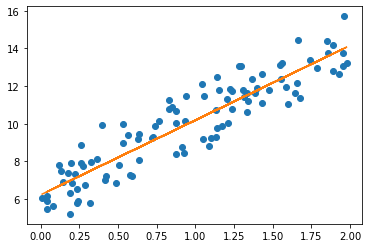

In [16]:
plt.plot(X,y,'o')
plt.plot(X,line_fitter.predict(X))
plt.show()

---

## 사이킷런 보스턴 주택가격 데이터

In [18]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
from scipy import stats
from sklearn.datasets import load_boston
%matplotlib inline

boston = load_boston()

bostonDF=pd.DataFrame(data=boston.data, columns=boston.feature_names)

bostonDF['PRICE'] = boston.target
bostonDF.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,PRICE
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33,36.2


- 각 컬럼별로 주택가격에 미치는 영향도를 조사

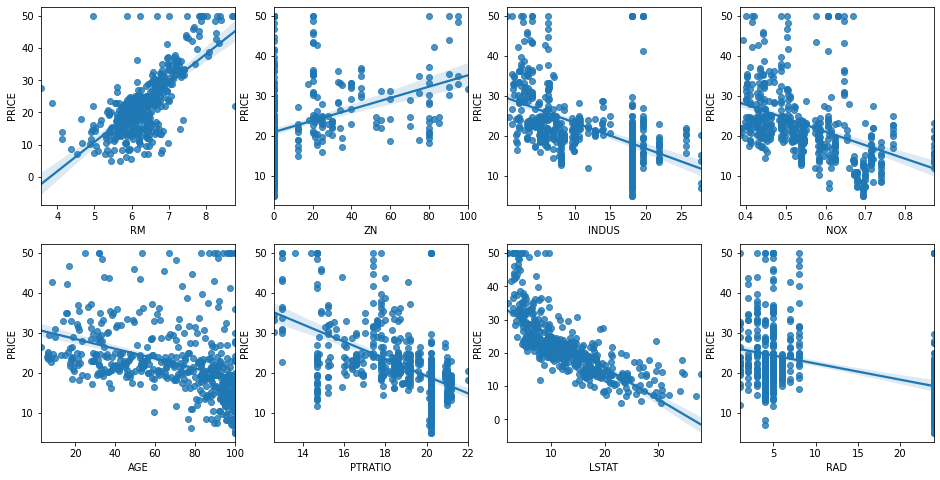

In [19]:
fig, axs = plt.subplots(figsize=(16,8) , ncols=4 , nrows=2)

lm_features = ['RM','ZN','INDUS','NOX','AGE','PTRATIO','LSTAT','RAD']

for i , feature in enumerate(lm_features):
    row = int(i/4)
    col = i%4

    # Seaborn의 regplot을 이용해 산점도와 선형 회귀 직선을 함께 표현
    sns.regplot(x=feature, y='PRICE', data=bostonDF, ax=axs[row][col])


In [22]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.model_selection import train_test_split

y_target = bostonDF['PRICE']
X_data = bostonDF.drop(['PRICE'],axis=1,inplace=False)

X_train, X_test, y_trian, y_test = train_test_split(X_data, y_target,
                                                   test_size=0.3,
                                                   random_state=156)

lr=LinearRegression()
lr.fit(X_train,y_trian)
y_preds = lr.predict(X_test)
mse = mean_squared_error(y_test, y_preds)
rmse =np.sqrt(mse)

print('mse : {0:.3f}, rmse : {1:.3f}'.format(mse,rmse))
print('variance score : {0:.3f}'.format(r2_score(y_test,y_preds)))

mse : 17.297, rmse : 4.159
variance score : 0.757


회귀식 추정 : 회귀계수

In [23]:
print('절편 값:',lr.intercept_)
print('회귀 계수값:',np.round(lr.coef_,1))

절편 값: 40.995595172164336
회귀 계수값: [ -0.1   0.1   0.    3.  -19.8   3.4   0.   -1.7   0.4  -0.   -0.9   0.
  -0.6]


In [24]:
coeff = pd.Series(data=np.round(lr.coef_,1), index=X_data.columns)
coeff.sort_values(ascending =False)

RM          3.4
CHAS        3.0
RAD         0.4
ZN          0.1
INDUS       0.0
AGE         0.0
TAX        -0.0
B           0.0
CRIM       -0.1
LSTAT      -0.6
PTRATIO    -0.9
DIS        -1.7
NOX       -19.8
dtype: float64

### 교차 검증으로 MSE와 RMSE 측정

In [25]:
from sklearn.model_selection import cross_val_score

y_target = bostonDF['PRICE']
X_data = bostonDF.drop(['PRICE'],axis=1,inplace=False)
lr = LinearRegression()

# cross_val_score( )로 5 Fold 셋으로 MSE 를 구한 뒤 이를 기반으로 다시  RMSE 구함. 
neg_mse_scores = cross_val_score(lr, X_data, y_target, scoring="neg_mean_squared_error", cv = 5)
rmse_scores  = np.sqrt(-1 * neg_mse_scores)
avg_rmse = np.mean(rmse_scores)

# cross_val_score(scoring="neg_mean_squared_error")로 반환된 값은 모두 음수 
print(' 5 folds 의 개별 Negative MSE scores: ', np.round(neg_mse_scores, 2))
print(' 5 folds 의 개별 RMSE scores : ', np.round(rmse_scores, 2))
print(' 5 folds 의 평균 RMSE : {0:.3f} '.format(avg_rmse))


 5 folds 의 개별 Negative MSE scores:  [-12.46 -26.05 -33.07 -80.76 -33.31]
 5 folds 의 개별 RMSE scores :  [3.53 5.1  5.75 8.99 5.77]
 5 folds 의 평균 RMSE : 5.829 
